In [22]:
import numpy as np
import pickle
import matplotlib.pyplot as plt


#Global diensions
w, h = 10.7, 15.24
n = 100
µu, varu = [1.2, 0, 0], [0.1, 0.1, 0.1]

In [23]:
def draw_env():
    plt.plot((0, w), (0, 0), 'g')
    plt.plot((0, 0), (h, 0), 'g')
    plt.plot((w, w), (h, 0), 'g')
    plt.plot((0, w), (h, h), 'g')
    plt.grid()


def draw_particles(p, color):
    xs, ys, thetas = p.T
    plt.plot(xs, ys, 'k.')
    plt.quiver(xs, ys, np.cos(thetas), np.sin(thetas), color=color)


def move_particles(p):
    newP = []
    for x, y, theta in p:
        #Motion Model
        mx = µu[0] * np.cos(theta)
        my = µu[1] * np.sin(theta)
        mtheta = 0
        #Estimation
        µx = x + mx
        µy = y + my
        µtheta = theta + mtheta
        #Sampling
        xt = np.random.normal(µx,varu[0])
        yt = np.random.normal(µy,varu[1])
        thetat = np.random.normal(µtheta,varu[2])
        #Add to the list
        newP.append([xt, yt, thetat])
    return np.array(newP)

loading data


<Figure size 750x600 with 0 Axes>

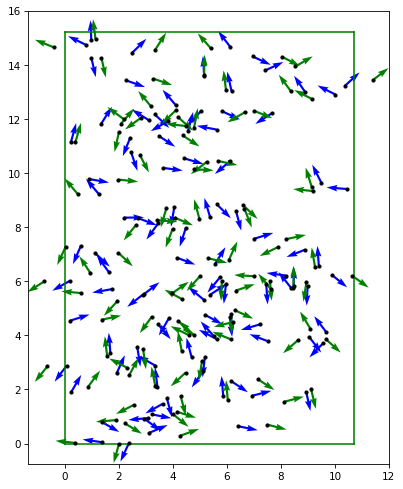

In [24]:
if __name__ == "__main__":
    print("loading data")
    with open("samples.dat", "rb") as f:
        positions = pickle.load(f)

    fig = plt.figure(figsize=(10, 8), frameon=True, dpi=75)
    #ax = fig.add_subplot(111)
    #ax.set_aspect("equal")
    #ax.grid()

    #position_polar = np.array(positions[0])
    #draw_points_one_trial(position_polar)

    fig = plt.figure(figsize=(10, 8), frameon=True, dpi=75)
    ax = fig.add_subplot(111)
    ax.set_aspect("equal")
    ax.grid()

    #Generate random particles
    xs = np.random.sample(n) * w
    ys = np.random.sample(n) * h
    theta = np.random.sample(n) * 2 * np.pi
    p = np.vstack((xs, ys, theta)).T

    draw_env()
    #Original==Blue
    draw_particles(p, 'b')
    newP = move_particles(p)
    #Moved==Green
    draw_particles(newP, 'g')

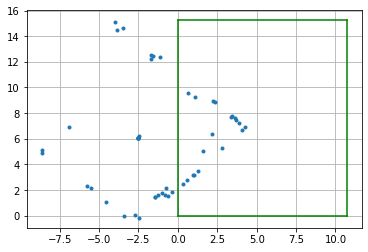

In [25]:
def distance_to_map(px, py):
    return map1.boundary.distance(Point((px, py)))

samples = np.array(positions[8])
idx = np.random.randint(len(positions[8]), size=50)
samples = samples[idx,:].T

xx = samples[1] * np.cos(np.radians(samples[0]))
yy = samples[1] * np.sin(np.radians(samples[0]))
θθ = [-np.pi / 6.0] * len(xx)
P = np.vstack((xx, yy, θθ)).T

x, y, θ = P[0]

spx = x + np.cos(θ) * xx  - np.sin(θ) * yy
spy = y + np.sin(θ) * xx  + np.cos(θ) * yy

draw_env()
plt.plot(spx, spy, '.')


In [27]:
# import sympy import Point, Polygon
from sympy import Point, Polygon
from shapely.geometry import Polygon, Point

sum = 0
weights = []

for pt in newP:
    for i in range(50):
        map1 = Polygon([[spx[i], spy[i]], [w, 0], [w, h], [0, h], [0, 0]])
        # using distance()
        sum += distance_to_map(pt[0], pt[1])
    weights.append(1/sum)
    sum = 0

for i in weights:
    print(i)


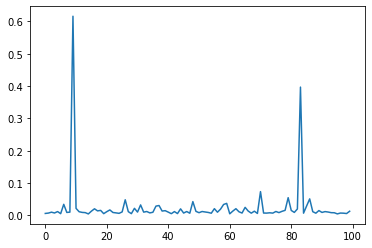

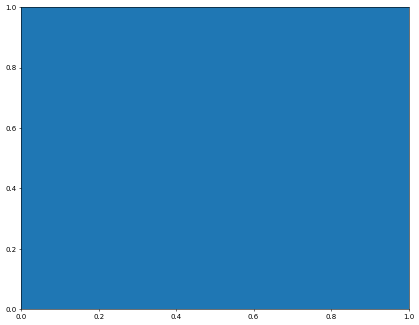

In [30]:
plt.plot(weights)
fig = plt.figure(figsize=(10, 8), frameon=True, dpi=50)
ax = fig.add_subplot(111)

for i in weights:
    draw_circle = plt.Circle((x, y), 20000/i, alpha=0.5)
    ax.add_artist(draw_circle)

In [ ]:
def draw_points_one_trial(position_polar):
    position = np.array([[position_polar[i, 1] * np.cos(position_polar[i, 0] * np.pi / 180),
                          position_polar[i, 1] * np.sin(position_polar[i, 0] * np.pi / 180)]
                         for i in range(position_polar.shape[0])])

    for i in range(position.shape[0]):
        plt.plot(position[:, 0], position[:, 1], 'ro', markersize=1)

loading data


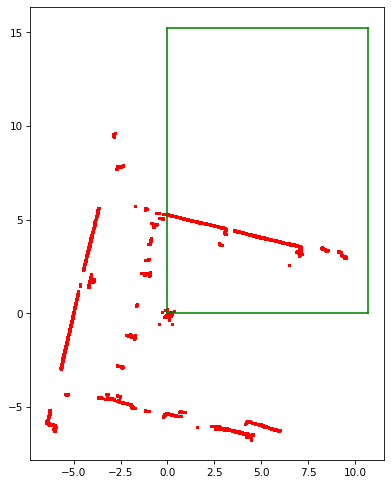

In [ ]:
if __name__ == "__main__":
    print("loading data")
    with open("samples.dat", "rb") as f:
        positions = pickle.load(f)

    fig = plt.figure(figsize=(10, 8), frameon=True, dpi=75)
    ax = fig.add_subplot(111)
    ax.set_aspect("equal")
    ax.grid()

    position_polar = np.array(positions[0])
    draw_points_one_trial(position_polar)

    draw_env()